Import module printing the dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#READ DATA
data=pd.read_csv("/content/drive/MyDrive/DATA/Example.csv")
data.head(10)

,Text,lable
0,`- This is not ``creative``. Those are the di...,1
1,` :: the term ``standard model`` is itself le...,0
2,"True or false, the situation as of March 200...",0
3,"Next, maybe you could work on being less cond...",1
4,This page will need disambiguation.,0
5,:If I may butt in I've spent the last 1/4 h...,1
6,` Changed Macedonia link to Macedon; ancients ...,1
7,"` :::: You're onto something important, there...",1
8,`I posted this to because the timeline confus...,0
9,There is no such thing as Christian religiocen...,1


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics
import nltk
from nltk.corpus import stopwords
import string
import re

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **SAMPLE DATA 4000**

In [ ]:
# Sample data

sample_data = data.sample(4000,replace=True, random_state=1)
X = sample_data['Text']
y = sample_data['lable']
print(X)
print(y)

235       == Parentage and children ==  I see this was...
3980      Wow, that's like six-million times better th...
905     `  It seems to me, to use a Christian metaphor...
2763    `   Sooooo... Does any OTHER admin want to com...
2895      ==  English versions ==  There is not need t...
                              ...                        
3292     :Like if you were from Switzerland (I'm think...
4040      ::Because the Scottish Episcopal Church is a...
2548      ::: just because freaky animal lib-ers are o...
418     `  Dear Squeakbox:  I have been very polite to...
1083      :As I understand it, there's no rule that it...
Name: Text, Length: 4000, dtype: object
235     0
3980    0
905     1
2763    1
2895    1
       ..
3292    1
4040    0
2548    1
418     1
1083    0
Name: lable, Length: 4000, dtype: object


# WORD CLOUD

In [ ]:
from wordcloud import WordCloud

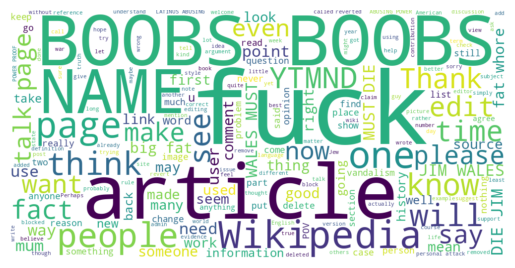

In [ ]:
# Sample a subset of the data to avoid processing the entire dataset
sample_data = data['Text'].sample(4000, replace=True,random_state=1)  # Adjust the sample size as needed

# Create a string with all text data from the sample
word_cloud = " ".join(str(text) for text in sample_data)

# Generate the word cloud
wordcloud = WordCloud(width=1000, height=500, background_color='white', min_font_size=10).generate(word_cloud)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.show()


# STOP WORDS

In [ ]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# CLEAN DATA

In [ ]:
import re
import string
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Dictionary of short forms and their corresponding full forms
abbreviation_map = {
    "isn't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "couldn't": "could not",
    "don't": "do not",
    "doesn't": "does not",
    "it's": "it is",
    "i'm": "I am",
    "you're": "you are",
    "he's": "he is",
    "she's": "she is",
    "we're": "we are",
    "they're": "they are",
    "I've": "I have",
    "we've": "we have",
    "you've": "you have",
    "they've": "they have",
    "I'll": "I will",
    "you'll": "you will",
    "he'll": "he will",
    "she'll": "she will",
    "we'll": "we will",
    "they'll": "they will",
    "I'd": "I would",
    "you'd": "you would",
    "he'd": "he would",
    "she'd": "she would",
    "we'd": "we would",
    "they'd": "they would",
    "let's": "let us",
    "who's": "who is",
    "what's": "what is",
    "where's": "where is",
    "there's": "there is",
    "here's": "here is",
    "that's": "that is",
    "how's": "how is",
    "isn't": "is not",
    "didn't": "did not",
    "wasn't": "was not",
    "weren't": "were not",
    "wouldn't": "would not",
    "shouldn't": "should not",
    "hasn't": "has not",
    "hadn't": "had not",
    "won't": "will not",
    "wouldn't": "would not",
    "couldn't": "could not",
    "doesn't": "does not"
}

def clean_text(text):
    # Handle potential float values by converting to string first
    if isinstance(text, float):
        text = str(text)

    # Convert to lowercase
    text = text.lower()

    # Replace short forms with full forms
    for short_form, full_form in abbreviation_map.items():
        text = text.replace(short_form, full_form)

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove email addresses
    text = re.sub(r'\b\w+@\w+\.\w+\b', '', text)

    # Remove digits
    text = re.sub(r'\d+', '', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove extra whitespace
    text = text.strip()

    # Remove multiple spaces
    text = re.sub(r'\s+', ' ', text)
    # Remove special characters and short words
    text = re.sub(r':|<|>|>>|[^a-zA-Z\s]', '', text)

    # Remove 1 or 2 character words (excluding specific words like "no")
    words_to_keep = ["no"]
    pattern = r'\b(?!' + r'\b|\b'.join(words_to_keep) + r'\b)\w{1,2}\b'
    text = re.sub(pattern, '', text)

    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])

    return text

# Apply the function to the 'Text' column of your DataFrame
data['Text'] = data['Text'].apply(clean_text)
data = pd.read_csv('/content/drive/MyDrive/DATA/Example.csv')

# Apply the clean_text function to the 'Text' column of your DataFrame
data['Cleaned_Text'] = data['Text'].apply(clean_text)

# Save the cleaned data to a new CSV file
data.to_csv('cleaned_data.csv', index=False)

data.head(20)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Text,lable,Cleaned_Text
0,`- This is not ``creative``. Those are the di...,1,creative dictionary definitions terms insuranc...
1,` :: the term ``standard model`` is itself le...,0,term standard model less npov think would pref...
2,"True or false, the situation as of March 200...",0,true false situation march saudi proposal land...
3,"Next, maybe you could work on being less cond...",1,next maybe could work less condescending sugge...
4,This page will need disambiguation.,0,page need disambiguation
5,:If I may butt in I've spent the last 1/4 h...,1,may butt ive spent last hour following andre t...
6,` Changed Macedonia link to Macedon; ancients ...,1,changed macedonia link macedon ancients call l...
7,"` :::: You're onto something important, there...",1,onto something important even liturgical renew...
8,`I posted this to because the timeline confus...,0,posted timeline confused hey tried clean timel...
9,There is no such thing as Christian religiocen...,1,thing christian religiocentrism come please st...


In [ ]:

data.head()
data.shape
print(data.shape)
print(data.head())
print(data.columns)
print(X.head())
print(y.head())


(4987, 3)
                                                Text lable  \
0  `- This is not ``creative``.  Those are the di...     1   
1  `  :: the term ``standard model`` is itself le...     0   
2    True or false, the situation as of March 200...     0   
3   Next, maybe you could work on being less cond...     1   
4               This page will need disambiguation.      0   

                                        Cleaned_Text  
0  creative dictionary definitions terms insuranc...  
1  term standard model less npov think would pref...  
2  true false situation march saudi proposal land...  
3  next maybe could work less condescending sugge...  
4                           page need disambiguation  
Index(['Text', 'lable', 'Cleaned_Text'], dtype='object')
235       == Parentage and children ==  I see this was...
3980      Wow, that's like six-million times better th...
905     `  It seems to me, to use a Christian metaphor...
2763    `   Sooooo... Does any OTHER admin want to com..

Eliminate last 17 thousand dataset beacuse its too long and time wasting

In [ ]:
data = data.iloc[:4000,:]

In [ ]:
data['lable'].value_counts()

,count
lable,
1,2330
0,1670


visualize the leable

<Axes: xlabel='lable'>

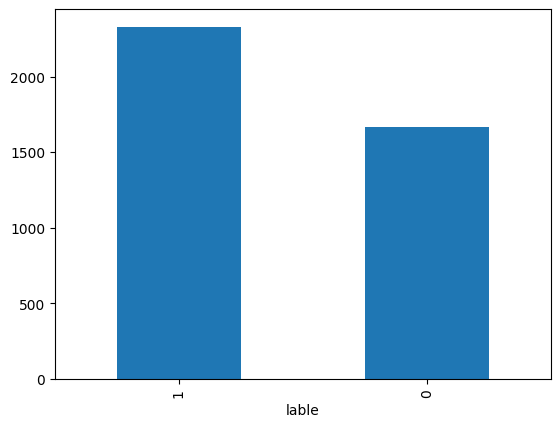

In [ ]:
data['lable'].value_counts().plot(kind='bar')

Creating a pie chart for the label i got

Text(0.5, 1.0, 'label distribution')

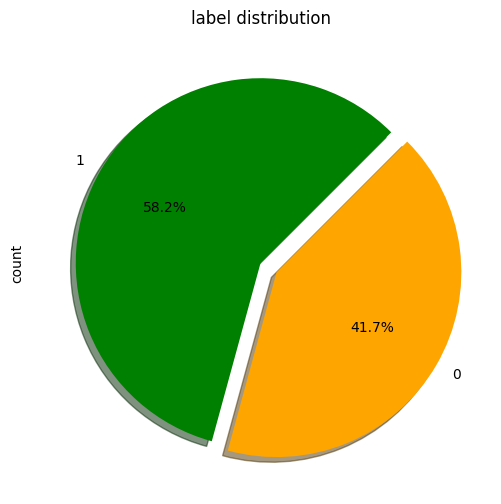

In [ ]:
plt.figure(figsize=(10,6))
colors = ['green', 'orange']
data['lable'].value_counts().plot(kind='pie', autopct='%.1f%%',shadow = True,colors = colors,startangle = 45,
                 explode=(0, 0.1))
plt.title('label distribution')


the code is trying to extract the value at the 999th position within the  column

visualizing the negetive and positive words,it counts frequents word of each category

In [ ]:
data['Text'][999]

'  == Pig Fenian ==  Nice wrist action boys, keep it up.  '

In [ ]:
print(data.columns)

Index(['Text', 'lable', 'Cleaned_Text'], dtype='object')


Text to numbering featuress


# Text to matrix

# **Use TfidfVectorizer**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer # convert a collection of raw text documents into a matrix
tfidf=TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None,use_idf=True,norm='l2',smooth_idf=True)
# Extract the label values from the 'data' DataFrame and assign them to variable 'y'
data['Text'] = data['Text'].fillna('')
y=data.lable.values
x=tfidf.fit_transform(data.Text)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.2,shuffle=False)

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
#cross-validation to select the best regularization parameter.
clf=LogisticRegressionCV(cv=6,scoring='accuracy',random_state=0,n_jobs=-1,verbose=3,max_iter=500).fit(X_train,y_train)
y_pred = clf.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   57.2s finished


In [ ]:
from sklearn import metrics


print("Test Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Train Accuracy:", metrics.accuracy_score(y_train, clf.predict(X_train)))


Test Accuracy: 0.6025
Train Accuracy: 0.5775


# Random Forest Classifier

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Step 1: Convert the text data into numerical features
vectorizer = CountVectorizer(strip_accents=None, lowercase=False, preprocessor=None)
X = vectorizer.fit_transform(data.Text)

# Step 2: Extract the label values
y = data.lable.values

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = rf.predict(X_test)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.55


# LSTM

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score


In [ ]:

# Assuming 'data' is a DataFrame containing the 'Text' and 'label' columns

# Step 1: Tokenize the text data
tokenizer = Tokenizer(num_words=10000)  # Limit the vocabulary size
tokenizer.fit_on_texts(data.Text)
X = tokenizer.texts_to_sequences(data.Text)

# Step 2: Pad the sequences to ensure uniform input length
max_len = 100  # You can choose a different max_len based on your data
X = pad_sequences(X, maxlen=max_len, padding='post')

# Step 3: Encode the labels
lable_encoder = LabelEncoder()
y = lable_encoder.fit_transform(data.lable)

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Define the LSTM model
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=max_len))
model.add(LSTM(units=128, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))

# Step 6: Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Step 7: Train the model
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# Step 8: Evaluate the model
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


50/50 ━━━━━━━━━━━━━━━━━━━━ 29s 451ms/step - accuracy: 0.5676 - loss: 0.6875 - val_accuracy: 0.5725 - val_loss: 0.6834
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 35s 345ms/step - accuracy: 0.5665 - loss: 0.6857 - val_accuracy: 0.5725 - val_loss: 0.6828
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 18s 357ms/step - accuracy: 0.5854 - loss: 0.6796 - val_accuracy: 0.5725 - val_loss: 0.6849
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 20s 346ms/step - accuracy: 0.5983 - loss: 0.6654 - val_accuracy: 0.5612 - val_loss: 0.6934
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 21s 350ms/step - accuracy: 0.6217 - loss: 0.6359 - val_accuracy: 0.5612 - val_loss: 0.7253
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 23s 398ms/step - accuracy: 0.6548 - loss: 0.5879 - val_accuracy: 0.5537 - val_loss: 0.8513
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 19s 386ms/step - accuracy: 0.6446 - loss: 0.5869 - val_accuracy: 0.5362 - val_loss: 0.8572
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 19s 353ms/step - accuracy: 0.6745 - loss: 0.5452 - val_accuracy: 0.553

# CNN

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer # for tokenization (text into integer)
from tensorflow.keras.preprocessing.sequence import pad_sequences # ensure all sequence has same length
from tensorflow.keras.models import Sequential # to create a sequential model
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout #layers needed to build a CNN  for text classification.
from tensorflow.keras.optimizers import Adam #to adjust the learning rate during training.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder # convert categorical labels into numeric form.
from sklearn.metrics import accuracy_score

# Step 1: Tokenize the text data
tokenizer = Tokenizer(num_words=10000)  # limit the vocabulary size
tokenizer.fit_on_texts(data.Text)
X = tokenizer.texts_to_sequences(data.Text) # converts the text data into sequences of integers

# Step 2: Pad the sequences to ensure uniform input length
max_len = 100  # if it’s longer than 100 tokens) or padded (if it’s shorter than 100 tokens) to have exactly 100 tokens.
X = pad_sequences(X, maxlen=max_len, padding='post') # [1,2] max len 3 then [1,2,0]

# Step 3: Encode the labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data.lable)

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Define the CNN model
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=max_len)) # turns positive integersinto dense vectors 128 of fixed size.
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))  # 1D input data , work in sequential data
model.add(GlobalMaxPooling1D()) #reducing the data size, reduce output of the Conv1D
model.add(Dense(units=64, activation='relu')) # neuron 64 , connect each neuron, relu for complex relationship in data
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))

# Step 6: Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Step 7: Train the model
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# Step 8: Evaluate the model
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


50/50 ━━━━━━━━━━━━━━━━━━━━ 8s 122ms/step - accuracy: 0.5773 - loss: 0.6831 - val_accuracy: 0.5725 - val_loss: 0.6824
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 114ms/step - accuracy: 0.5947 - loss: 0.6621 - val_accuracy: 0.5725 - val_loss: 0.6818
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 8s 153ms/step - accuracy: 0.6535 - loss: 0.6080 - val_accuracy: 0.5663 - val_loss: 0.6926
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 6s 122ms/step - accuracy: 0.9002 - loss: 0.4150 - val_accuracy: 0.5487 - val_loss: 0.7754
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - accuracy: 0.9731 - loss: 0.1517 - val_accuracy: 0.5025 - val_loss: 0.9353
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 143ms/step - accuracy: 0.9820 - loss: 0.0780 - val_accuracy: 0.5238 - val_loss: 1.0252
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 8s 89ms/step - accuracy: 0.9878 - loss: 0.0546 - val_accuracy: 0.5088 - val_loss: 1.0953
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 7s 132ms/step - accuracy: 0.9929 - loss: 0.0368 - val_accuracy: 0.5150 - val_